# Assignment 1
N diatomic molecules are stuck on a metal surface of square symmetry. Each molecule can either lie flat on the surface in which case it must be aligned to one of two directions, $x$ and $y$, or it can stand up along the $z$ direction. There is an energy cost of $\epsilon>0$ associated with a molecule standing up, and zero energy for molecules lying flat along x or y directions. 
*	How many microstates have the smallest value of energy? What is the largest microstate energy? 
*	For microcanonical macrostates of energy $E$, calculate the number of states omega and the entropy $S$.
*	Calculate the heat capacity $C(T)$. Sketch the result or use python to produce a plot. 
*	What is the probability that a specific molecule is standing up?
*	What is the largest possible value of the internal energy at any possible temperature?


Import useful modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We will start by generating all possible microstates corresponding to a specific number of molecules. We will also specify the energy states accessible to each molecule in a flexibly way, so that the simulation can be repeated for two-level systems or for three-level systems with different degeneracies or energies.

In [3]:
n_molecules=15 # number of molecules adsorbed
epsilon=1.0 # this is a real number that controls the scale of the energy. Whenever playing with toy models, it is a good idea to set to unity as many parameters as possible
kb=1.0 # here we will assume that the choice above for the energy scale is consistent with a unit value of the boltzmann constant
molecule_states=np.array([0, 0, 1]) # these are the states mentioned in the problem
n_molecule_states=molecule_states.size # the size attribute of a numpy array can be convenient

Compute a few simple property of the full system

In [4]:
n_microstates=n_molecule_states**n_molecules # number of microstates
lowest_energy=molecule_states[0]*epsilon*n_molecules # the lowest energy is obtained when all the molecules are in their lowest energy state
highest_energy=molecule_states[-1]*epsilon*n_molecules # the maximum energy is obtained when all the molecules are in their highest energy state

Here we create a new function that given a set of microstates for a system of n-1 molecules, generates a new set including the possible states of an additional molecule.
NOTE, while we could save the orientation of each molecule in the microstate, for a sake of not working with arrays that are too big we only store the total energy of each microstate.

In [5]:
def add_molecule(energies_in,molecule_states):
    """
    function to generate the energies of the microstates of n molecules once we have the 
    microsates of n-1 molecules and the states of a single molecule
    """
    n_microstates_old=energies_in.size
    n_molecule_states=molecule_states.size
    n_microstates_new=n_molecule_states*n_microstates_old
    energies_out=np.zeros(n_microstates_new)
    i=0
    for energy in energies_in:
        for molecule_state in molecule_states:
            energies_out[i]=energy+molecule_state
            i+=1
    return energies_out

We can now use the function above iteratively, starting from a zero energy for the system with 0 molecules, up to the total number of molecules in the simulation. 
NOTE: Pay attention to not make n_molecules too big. This process generates a numpy array of size equal to the number of microstates. If you choose a number of molecules that is too large, the code will probably crash or get stuck.

In [6]:
energies=np.zeros(1)
for i in np.arange(n_molecules):
    energies=add_molecule(energies,molecule_states)

We can plot the distribution of energies, i.e. the number of microstates for each value of the energy, using the hist() function of pyplot

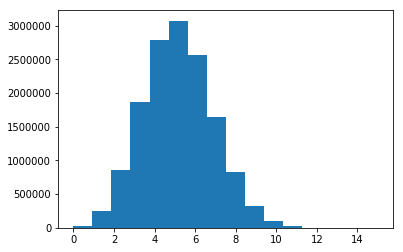

In [7]:
plt.hist(energies,bins=molecule_states[-1]*n_molecules+1)
plt.show()

In the following we just count the number of states directly, the results should be equivalent to the heights of the bars in the previous plot

In [8]:
omega_of_e_exact=np.zeros(molecule_states[-1]*n_molecules+1,dtype=int)
for energy in np.arange(molecule_states[-1]*n_molecules+1):
    omega_of_e_exact[energy]=np.count_nonzero(energies==energy)
print(omega_of_e_exact)

[  32768  245760  860160 1863680 2795520 3075072 2562560 1647360  823680
  320320   96096   21840    3640     420      30       1]


While the process above gives us the exact number of microstates for each possible energy, it is only practical for small system, so not exactly the goal of our course. However, we can try an alternative approach, where we randomly sample microstates and use these to approximate the energy distribution.

In [9]:
n_molecules=15
n_samples=100000 # this is the number of microstates that we decided to generate
energies_samples=np.zeros(n_samples)
for i in np.arange(n_samples):
    energies_samples[i]=np.sum(np.random.choice(molecule_states,n_molecules)) 
    # here we use the np.random.choice() function to pick a random state for each molecule

Let's plot the distribution of energies for the randomly samples microstates and compare it with the exact result.

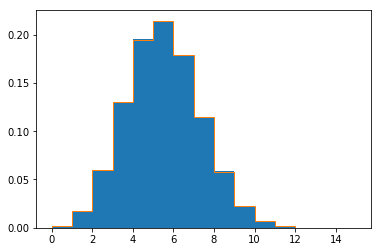

In [10]:
lowest_energy=molecule_states[0]*epsilon*n_molecules # the lowest energy is obtained when all the molecules are in their lowest energy state
highest_energy=molecule_states[-1]*epsilon*n_molecules # the maximum energy is obtained when all the molecules are in their highest energy state
plt.hist(energies_samples,density=True,bins=np.arange(lowest_energy,highest_energy+1))
plt.hist(energies,density=True,bins=np.arange(lowest_energy,highest_energy+1),histtype='step')
plt.show()

For $N=15$ molecules the results look great. The advantage of random sampling is that it easily generalize to systems composed by many more molecules. Let's repeat the process for a larger $N$.

In [11]:
n_molecules=100
n_samples=100000
energies_samples=np.zeros(n_samples)
for i in np.arange(n_samples):
    energies_samples[i]=np.sum(np.random.choice(molecule_states,n_molecules))

When we visualize the results we can see that the distribution of energies has a characteristic shape. Can you guess which probability density function is a good approximation to this result?

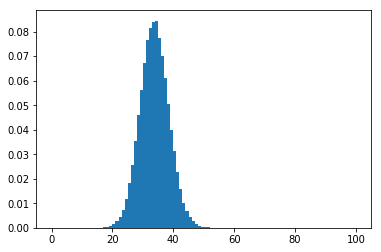

In [45]:
lowest_energy=molecule_states[0]*epsilon*n_molecules # the lowest energy is obtained when all the molecules are in their lowest energy state
highest_energy=molecule_states[-1]*epsilon*n_molecules # the maximum energy is obtained when all the molecules are in their highest energy state
bins=np.arange(lowest_energy,highest_energy+1)
plt.hist(energies_samples,density=True,bins=bins)
plt.show()